# **Intro to Machine Learning**

In this workshop, we will learn the basics of machine learning. We will start by trying basic annd standardized machine learning techniques with a toy example (part 1) followed by learning how to implement our custom neural networks (part 2). The goal of the workshop is to understand the simplicity of implementing machine learning.

**Prerequisites**: Basic knowledge of Python and a basic overview of machine learning fundamentals (e.g., through pre-workshop prep work in conjunction with in-class lecture by Jan and Peter).

# Part 1: Basic machine learning

When you are working with small data (such as small vectors and/or only a few training examples), standard machine learning approaches such as support vector machines (SVMs) and logistic regression are often sufficient to solve your problem. Fortunately, Python comes with a convenient library called `scikit-learn` which makes it ridiculously easy to implement basic machine learning techniques. Let's say you have the following training data, which we randomly generate in only 2 lines of code using one of the convenient `scikit-learn` generator functions:



In [0]:
# Generate our training data.

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2)

print('Input data: ')
print(X)
print()
print()
print()
print('Predictive data: ')
print(y)

Input data: 
[[  7.20373987  -3.71189018]
 [  6.79367161  -1.98597899]
 [  6.74842922  -1.49444422]
 [  5.42243926  -1.14513222]
 [  9.7055844   -1.0900761 ]
 [  9.79315977  -2.56446374]
 [  1.0319485   -8.4111421 ]
 [ 10.24624641  -0.96590843]
 [ 10.95692693  -1.59463521]
 [  5.04084603  -1.30848123]
 [  3.36599439  -7.91673827]
 [  2.68842465 -10.09552183]
 [  2.17267065  -1.10548787]
 [  5.65592371  -2.84350992]
 [ 10.49587741  -2.03844519]
 [ 11.61657341  -3.1821537 ]
 [  7.85616126  -1.1132728 ]
 [  1.79133482 -10.3915578 ]
 [  7.50608275  -2.249433  ]
 [  3.94604353  -1.81888282]
 [  3.3696267  -10.21432077]
 [  4.52035743  -1.69873187]
 [  5.84308801  -3.73764232]
 [  3.3041451   -8.50053763]
 [  3.41665252  -7.71370928]
 [  5.93599542  -4.11981008]
 [  4.33332608  -2.93242992]
 [  8.09019651  -2.74684593]
 [  6.36092562  -1.71974839]
 [  8.63945077  -1.75730262]
 [ 10.09862642  -2.66804657]
 [  5.17285196  -2.17992767]
 [  9.47732694  -3.66712961]
 [  2.8093357   -6.42234997]
 

Let's visualize the data on a plot. The first component of each input x vector is plotted on the x-axis while the second component of each input x vector is plotted on the y-axis. The dots are colored by their y-value (or "class"). The goal of machine learning is to predict the class from the input X vector. 

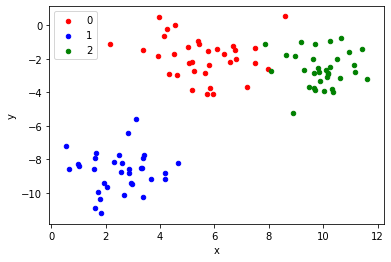

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

**Exercise 1:** Let's say you trained your machine learning model with the above "training data". If you were given a new point (0, 0) and wanted to predict its class, which class would you predict based on the plot above?

Let's say we want to predict the class (0, 1, or 2) based on a 2 element X vector. We can use any machine learning method we want to predict the class from any arbitrary x input vector. First, let's try one technique, the Support Vector Machine (SVM), for this task. The code to train the model is literally this easy:



In [0]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now, we can predict the output given a test input:

In [0]:
clf.predict([[10, -2]])

array([2])

Yay! Given a dataset, we were able to "do machine learning" in only 3 lines of code! You can also predict the class of multiple vectors at once:

In [0]:
clf.predict([[-10.5, 2.3],
             [3.5, -100.2],
             [100, 101]])

array([0, 0, 0])

**Exercise 2:** Do these predictions make sense based on the plot of the data? Why or why not? Test a few other input vectors that you predict the SVM will predict as 0, 1, and 2 (each).

In [0]:
### YOUR CODE HERE ###


**Exercise 3:** Google the `scikit-learn` documentation to figure out how to implement logistric regression, linear regression, and decision tree classifiers. For all of these classifiers, predict the class of the same input vectors you used in Exercise 2.

In [0]:
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
clf.fit(X, y) 
clf.predict([[10, -2]])

array([2])

**Exercise 4:** Using the code for generating the sample dataset as a starting place, (1) generate a dataset with 5000 examples (instead of 100) and 50 features (instead of 2). Note that unlike when using training data with 2 dimensions, it is very difficult (or impossible) to visualize input data with 50 features (unless you use a family of techniques called "dimensionality reduction" which is beyond the scope of this workshop).

In [0]:
### YOUR CODE HERE ###


**Exercise 5:** Split your training set above such that 80% are allocated for training and 20% are allocated for testing. Retrain using the 4 different classifiers. Based on the performance on the test set, which classifier performs the best?



In [0]:
### YOUR CODE HERE ###


# Part 2: Neural Networks

Sometimes, you have a lot of data from which you can train. Furthermore, these data may contain several features/complexities (like the 50-dimensional dataset you generated above). Fortunately, neural networks are able to scale appropriately to the size of the dataset and can handle arbitrarily big data in theory. As a result, deep learning has taken over as the go-to method for any BIG data problem.

Note: If you are collecting your own datasets for this class, it is likely that your dataset will be much too small for a neural network. You have two options in this case: (1) use the simpler classifiers covered in Part 1 of this tutorial or (2) use techniques called "data augmentation" and "transfer learning" and then use a neural network (these techniques are beyond the scope of this workshop but ask the course staff if you need help implementing this).

In this part of the workshop, we will predict handwritten digits from images. The inputs in this case are matrices representing the content of the corresponding image. We are using black and white images, where 0 indicates the color "black" and 1 indiicates the color "white".  The output in this case is a digit (0 through 9) representing the digit represented by the dataset.

To "do deep learning", we will use a very convenient Python library called `keras`. Let's start by importing `keras`, which conveniently comes with a handwritten dataset loaded in:

In [0]:
# Import statements.
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils, to_categorical

Using TensorFlow backend.


Now, let's load in the handwritten dataset (called "MNIST"):

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

We can print the dataset to see that these greyscale image data are represented as matrices of 0s and 1s:



In [0]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Let's view some examples of the images in our dataset:

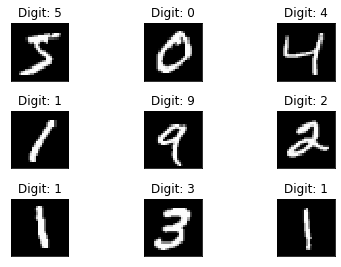

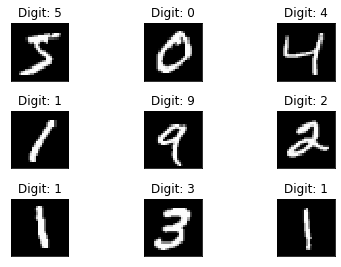

In [0]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Lets view the "shape" of the training and test sets:

In [0]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


We see that the training set has 60,000 images and the testing set has 10,000 images. Each image is a matrix of 1s and 0s with dimensions 28x28 pixels.

Let's start the process of putting these images into a neural network! In this case, we will use a standard [Multi-Layer Perceptron (MLP)](https://en.wikipedia.org/wiki/Multilayer_perceptron) network. As we see from [this image](http://rasbt.github.io/mlxtend/user_guide/classifier/NeuralNetMLP_files/neuralnet_mlp_1.png) of a MLP and as we recall from this workshop's lecture, MLP neural networks take a vector in as input. Therefore, let's "flatten" our 28x28 input matrices into a single vector (of size 28x28=784):

In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


We should convert the y values to categorical variables (since that is what we are predicting):

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Let's build a very simple MLP network (sometimes called a "Dense" network because each node in any given layer is fully connected to every other node in this next layer):

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

We always have to "compile" our model:

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Now, let's train the model. We specify the number of "epochs", which is the number of passes that are made through the input data during the network training process. We keep some of the data as "validation" so we can determine if we ever "overfit" the network to the training data. If the validation data, which are not used to train the data, yield a lower accuracy than the training set, we know that the model has overfit to the data.

In [0]:
history = model.fit(X_train, y_train,
          batch_size=128, epochs=5,
          verbose=2,
          validation_data=(X_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





 - 11s - loss: 0.2454 - acc: 0.9251 - val_loss: 0.1020 - val_acc: 0.9684
Epoch 2/5
 - 10s - loss: 0.1038 - acc: 0.9683 - val_loss: 0.0774 - val_acc: 0.9759
Epoch 3/5
 - 9s - loss: 0.0722 - acc: 0.9772 - val_loss: 0.0674 - val_acc: 0.9776
Epoch 4/5
 - 9s - loss: 0.0570 - acc: 0.9818 - val_loss: 0.0730 - val_acc: 0.9776
Epoch 5/5
 - 10s - loss: 0.0458 - acc: 0.9849 - val_loss: 0.0643 - val_acc: 0.9815


We can easily evaluate the performance of the model as well:

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06425150974661228
Test accuracy: 0.9815


Pretty good accuracy, right?

Can we do even better?

Yes we can, using convolutional neural networks (CNNs) (see workshop lecture). Let's build a simple CNN for this problem:

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Before we retrain, we have to reshape our data to be able to be input into a CNN, which can take an entire matrix (or series of matrices in the case of RGB color images) as input:


In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

**Exercise 6:** Evaluate the performance of the CNN. Does it perform better than the MLP network? Does it overfit? Hint: you may need to train the network for a few more epochs in order for the performance to converge to its optimum. This waiting is a natural part of the machine learning process.

In [0]:
### YOUR CODE HERE ###

# (just to verify)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, y_train,
          batch_size=128, epochs=5,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


KeyboardInterrupt: ignored

**Exercise 7 (challenge):** Try different neural network architectures as you see fit. Also try different parameters to feed into the network (these are called "hyperparameters"). Can you build a network that performs better than one of the two that we provided? Can you automate the process of finding the optimal parameteres for the neural network using a series of nested for loops?

In [0]:
### YOUR CODE HERE ###


# Part 3: Parting Words and Common Pitfalls

Congrats! You were able to make machines learn using a variety of different methods in a very short period of time. Great work!

We note that at the end of the day, "machine learning" is just automated complex (and sometimes, simple) statistics. We leave you with a list of common pitfalls in machine learning:

1. **Unbalanced datasets:** It is important for you to have an equal number of data points representing each class in both your training and testing datasets. To illustrate this point, imagine if your classifier is supposed to predict "0" or "1" for having a disease but always predicts "0". What would the performance of the network be reported as if the testing set only contained examples labeled as "0"? You can mitigate this problem by either upsampling or downsampling the datasets.
2. **Overfitting:** If you train your models with data that is not representative of the entire space of possible inputs, the model will not generalize when trying to predict new data that do not resemble the training data. This can also happen if you train your neural network for too many epochs.
3. **Ineffective evaluation metrics:** Accuracy is one performance of success of models, but it does not correctly distinguish true positive rates and false positive rates. See the table on the righthand side of [this Wikipedia article](https://en.wikipedia.org/wiki/Confusion_matrix) to see all of the common machine learning metrics used. 

Cheers,

p